Title: How to Format Large Tick Values
Slug: how-format-large-tick-values
Summary: How to re-format very large tick values on visualizations to be in a simpler format with K, M or B notation
Date: 2018-09-20 12:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: bar chart
Keywords: format large tick values
Authors: Dan Friedman

In this tutorial, I'll illustrate an example of how it's difficult to read very large tick values (typically in the thousands or greater) on data visualizations and how you can re-format those tick values to be easier to understand for readers.

### Import Modules

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
% matplotlib inline

### Visualization Setup Code

In [29]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

### Example: Visualizing High Net Worth University of Michigan Alumni

Below is a small dataset of eight high net worth individuals that graduated from the University of Michigan - Ann Arbor.

In [30]:
data ={'net_worth_us_dollars': [800000000, 180000000, 3500000000, 1800000000, 2500000000, 1300000000, 2500000000, 185000000], 
       'name': ['Tony Fadell', 'Tom Brady', 'William Davidson', 'Charlie Munger', 'Steve Blank', 'Niklas Zennström', 'Eric Paul Lefkofsky', 'Derek Jeter']}
df = pd.DataFrame(data)

In [31]:
df.sort_values(by='net_worth_us_dollars', ascending=False)

,name,net_worth_us_dollars
2,William Davidson,3500000000
4,Steve Blank,2500000000
6,Eric Paul Lefkofsky,2500000000
3,Charlie Munger,1800000000
5,Niklas Zennström,1300000000
0,Tony Fadell,800000000
7,Derek Jeter,185000000
1,Tom Brady,180000000


#### Bar Chart with Scientific Notation on X-Ticks

This visualization below is the simplest plot of the data. However, it's confusing. It's difficult to immediately translate the scientific notation values into a colloquial format.

If I were to ask you the net worth of Steve Blank, it would take you a bit to convert 2.5e9 to \$2.5B.

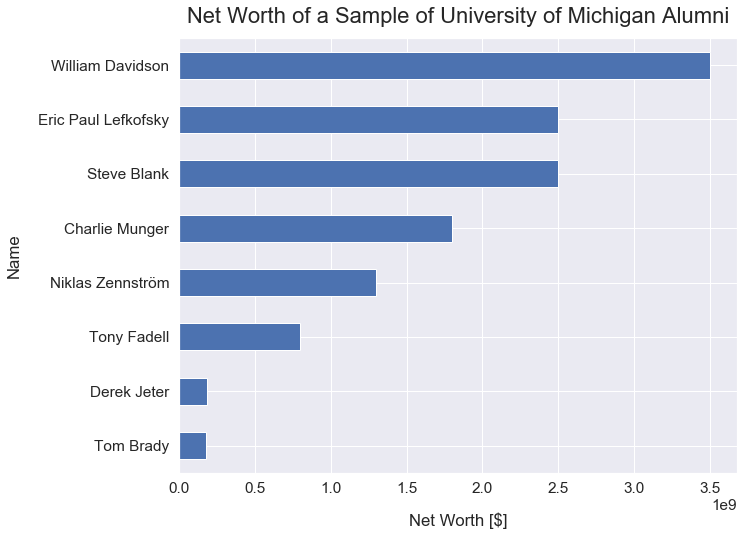

In [32]:
df.set_index('name')['net_worth_us_dollars'].sort_values().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Net Worth [$]", labelpad=16)
plt.ylabel("Name", labelpad=16)
plt.title("Net Worth of a Sample of University of Michigan Alumni", y=1.02, fontsize=22);

Another similar issue that may arise with tick values - similar to the one above is if the full numerical values were listed out. For example, William Davidson's horizontal bar would align with the x-tick value of 3500000000. It would take someone a few seconds to convert that value into a more understandable format such as 3,500,000,000 or 3.5B.

#### Bar Chart with Easily Interpretable Dollar Amounts on X-Ticks

This plot below is much better!

We can easily identify an approximation for the net worth of those eight individuals that would easily make sense to a mass audience. For example, William Davidson has a net worth of \$3.5B.

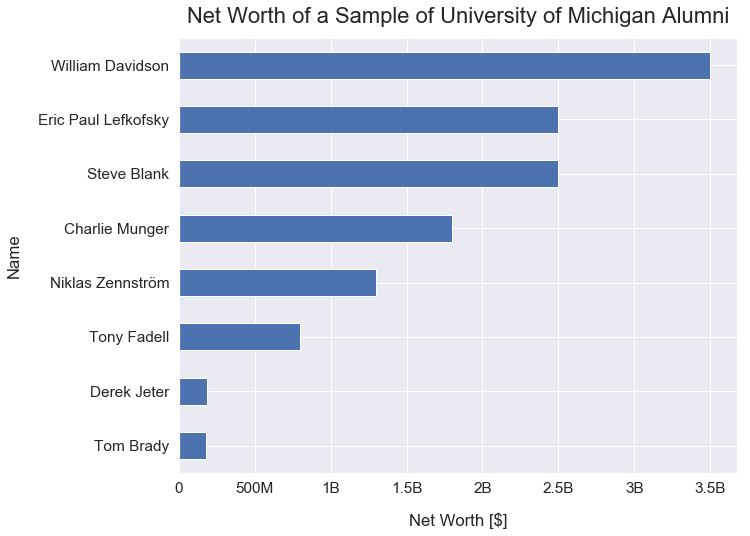

In [33]:
df.set_index('name')['net_worth_us_dollars'].sort_values().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Net Worth [$]", labelpad=16)
plt.ylabel("Name", labelpad=16)
plt.title("Net Worth of a Sample of University of Michigan Alumni", y=1.02, fontsize=22)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));